In [82]:
##Load the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk

In [83]:
df=pd.read_csv("/content/SMSSpamCollection.csv",sep="\t")
df.head()

,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


In [84]:
df.columns=["label","message"]
df.head()

,label,message
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...


# Exploring the data set

In [85]:
df.shape

(5567, 2)

In [86]:
df.describe()

,label,message
count,5567,5567
unique,2,5164
top,ham,"Sorry, I'll call later"
freq,4821,30


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5567 non-null   object
 1   message  5567 non-null   object
dtypes: object(2)
memory usage: 87.1+ KB


In [88]:
df.isnull().sum()

,0
label,0
message,0


In [89]:
df.label.value_counts()

,count
label,
ham,4821
spam,746


In [90]:
df.label.value_counts(normalize=True)

,proportion
label,
ham,0.865996
spam,0.134004


<Axes: ylabel='count'>

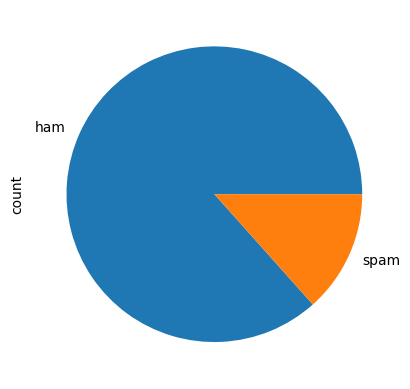

In [91]:
df.label.value_counts().plot.pie()

In [92]:
#copy form data
SMS_SH_df=df.copy()

#visualization.

<ipython-input-105-b26bc18c5128>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df.label,palette="rainbow")


<Axes: xlabel='count', ylabel='label'>

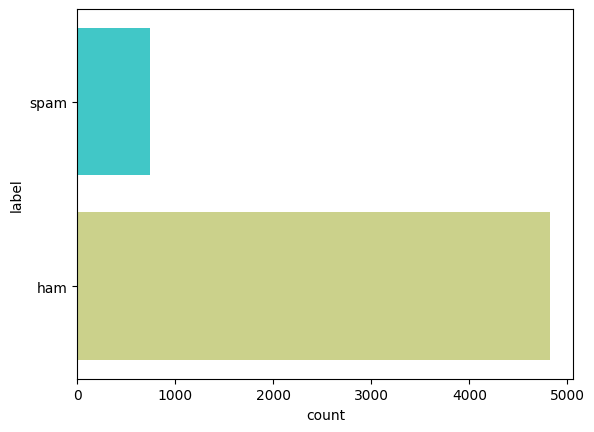

In [105]:
sns.countplot(df.label,palette="rainbow")

#  Data Preparation-Pre-processing text

---

### 1- Remove punctuation

---




In [93]:
#1-Remove punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [94]:
def remove_punctuation(text):
  punctuation_free="".join([i for i in text if i not in string.punctuation])
  return punctuation_free

In [95]:
SMS_SH_df["clean_message"]=SMS_SH_df["message"].apply(lambda x:remove_punctuation(x))
SMS_SH_df.head()

,label,message,clean_message
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
2,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL
4,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...


#### 2 Converting text to lowercase

In [96]:
def Lower_case(text):
  return text.lower()

In [97]:
SMS_SH_df["clean_message"]=SMS_SH_df["clean_message"].apply(lambda x:Lower_case(x))
SMS_SH_df.head()

,label,message,clean_message
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
2,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will
4,ham,As per your request 'Melle Melle (Oru Minnamin...,as per your request melle melle oru minnaminun...


#3-Tokenization

In [98]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [99]:
def tokenize(text):
    return word_tokenize(text)
SMS_SH_df["tokenize_message"]=SMS_SH_df["clean_message"].apply(lambda x:tokenize(x))
SMS_SH_df.head()

,label,message,clean_message,tokenize_message
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
1,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
2,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ..."
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]"
4,ham,As per your request 'Melle Melle (Oru Minnamin...,as per your request melle melle oru minnaminun...,"[as, per, your, request, melle, melle, oru, mi..."


##4- Remove Stop words
**Stop Words:** A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.


In [100]:
from nltk.corpus import stopwords

In [101]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [102]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [103]:
def remove_stopwords(text):
  remove_stopwords=[i for i in text if i not in stopwords.words("english")]
  return remove_stopwords
SMS_SH_df["remove_stopwords"]=SMS_SH_df["tokenize_message"].apply(lambda x:remove_stopwords(x))
SMS_SH_df.head()

,label,message,clean_message,tokenize_message,remove_stopwords
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
1,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
2,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnamin...,as per your request melle melle oru minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi..."


#5-Stemming

In [117]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [118]:
def stemming(text):
  stem_text=[ps.stem(i) for i in text]
  return stem_text
SMS_SH_df["stem_message"]=SMS_SH_df["remove_stopwords"].apply(lambda x:stemming(x))
SMS_SH_df.head()

,label,message,clean_message,tokenize_message,remove_stopwords,stem_message
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
1,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
2,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnamin...,as per your request melle melle oru minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, mell, mell, oru, minnaminungint..."


#6-Lemmatiztion

In [122]:
from os import WNOHANG
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wn=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [123]:
def Lemmatizer(text):
  Lemmatizer_text=[wn.lemmatize(i) for i in text]
  return Lemmatizer_text
SMS_SH_df["Lemmatizer_message"]=SMS_SH_df["remove_stopwords"].apply(lambda x:Lemmatizer(x))
SMS_SH_df.head()

,label,message,clean_message,tokenize_message,remove_stopwords,stem_message,Lemmatizer_message
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
1,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
2,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,i have a date on sunday with will,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnamin...,as per your request melle melle oru minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, mell, mell, oru, minnaminungint...","[per, request, melle, melle, oru, minnaminungi..."


#7- Vectoriztion
**Vectorizing :** The process that we use to convert text to a form that Python and a machine learning model can understand,will Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occurred in that document.


In [129]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [130]:
vectorizer.fit(SMS_SH_df["clean_message"])

CountVectorizer()

In [131]:
features = vectorizer.transform(SMS_SH_df["clean_message"])

In [134]:
feature_names = vectorizer.get_feature_names_out()
feature_cv = pd.DataFrame(features.toarray(), columns=feature_names)
feature_cv

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5564,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature extraction

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
features_tfidf = tfidf_vectorizer.fit_transform(SMS_SH_df["clean_message"])

In [138]:
# Modify CountVectorizer or TfidfVectorizer to include n-grams
vectorizer = CountVectorizer(ngram_range=(1, 2))  # Includes unigrams and bigrams
features_ngrams = vectorizer.fit_transform(SMS_SH_df["clean_message"])

#normalization

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [140]:
scaler.fit(feature_cv)

MinMaxScaler()

In [142]:
features_train_scaled = scaler.transform(feature_cv)
features_test_scaled = scaler.transform(feature_cv)

#Model Building

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


In [145]:
x_train,x_test,y_train,y_test=train_test_split(features_train_scaled,df["label"],test_size=0.2,random_state=42)

In [146]:
x_train.shape,x_test.shape

((4453, 9538), (1114, 9538))

In [148]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [149]:
y_train

,label
3916,spam
3984,ham
2758,ham
4795,ham
4502,ham
...,...
3772,ham
5191,spam
5226,ham
5390,ham


##  Random Forest  Algorithem

In [152]:
rf_model = RandomForestClassifier(n_jobs=-1)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [153]:
rf_pred = rf_model.predict(x_test)

In [154]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9784560143626571


In [155]:
rf_report = classification_report(y_test, rf_pred)
print("Random Forest Classification Report:\n", rf_report)

Random Forest Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       967
        spam       1.00      0.84      0.91       147

    accuracy                           0.98      1114
   macro avg       0.99      0.92      0.95      1114
weighted avg       0.98      0.98      0.98      1114



In [156]:
from sklearn.naive_bayes import MultinomialNB  # For text classification

In [157]:
nb_model = MultinomialNB()

In [158]:
nb_model.fit(x_train, y_train)  # X_train: features, y_train: labels

MultinomialNB()

In [160]:
y_pred = nb_model.predict(x_test)  # X_test: test features

In [161]:
nb_model_accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", nb_model_accuracy)

Naive Bayes Accuracy: 0.9856373429084381


              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       967
        spam       0.93      0.96      0.95       147

    accuracy                           0.99      1114
   macro avg       0.96      0.97      0.97      1114
weighted avg       0.99      0.99      0.99      1114



<Axes: >

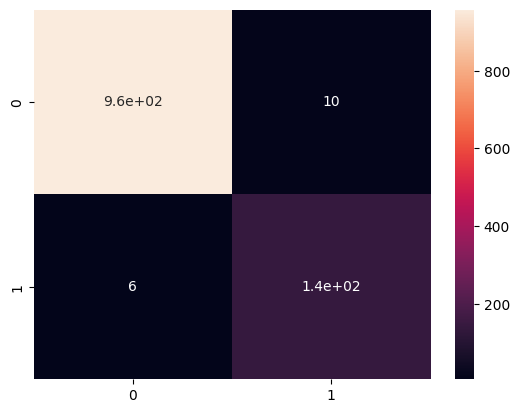

In [163]:
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)